# Distribution Plots

When dealing with a set of data, often the first thing you’ll want to do is get a sense for how the variables are distributed. This chapter of the tutorial will give a brief introduction to some of the tools in seaborn for examining `univariate` and `bivariate` distributions.

Let's discuss some plots that allow us to visualize the distribution of a data set. These plots are:

* distplot
* jointplot
* pairplot
* rugplot
* kdeplot
* scatterplot
* relplot
* lineplot

___
## Imports

In [24]:
#%matplotlib notebook
import seaborn as sns
%matplotlib inline

In [25]:
import warnings
warnings.filterwarnings("ignore")

## Data
Seaborn comes with built-in data sets!

In [26]:
tips = sns.load_dataset('tips')

In [27]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Univariate Distribution

## distplot


The most convenient way to take a quick look at a univariate distribution in seaborn is the distplot() function. By default, this will draw a `histogram` and fit a `kernel density estimate`.

### Histogram

 A histogram represents the frequency distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.

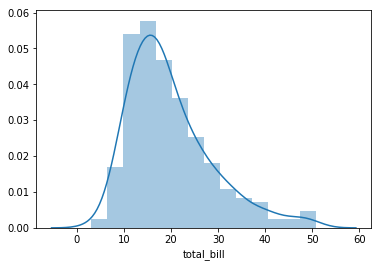

In [28]:
sns.distplot(tips['total_bill'])
# Safe to ignore warnings

To remove the `kde` layer and just have the histogram use:

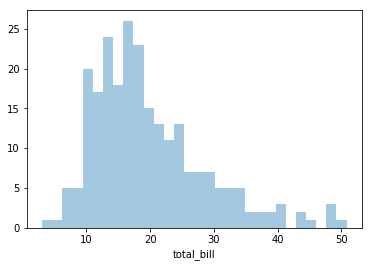

In [29]:
sns.distplot(tips['total_bill'],kde=False,bins=30)

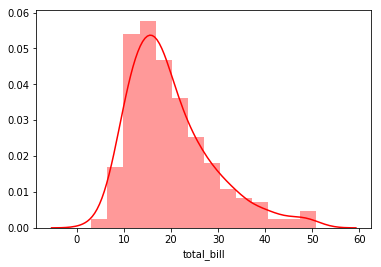

In [30]:
sns.distplot(tips['total_bill'],rug=False,color='r')

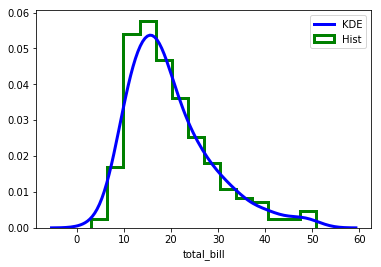

In [40]:
sns.distplot(tips['total_bill'],
                  kde_kws={"color": "b", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                             "alpha": 1, "color": "g","label":'Hist'})

### Kernel Density Estimation(KDE)

The kernel density estimate may be less familiar, but it can be a useful tool for plotting the shape of a distribution. Like the histogram, the KDE plots encode the density of observations on one axis with height along the other axis:

Drawing a KDE is more computationally involved than drawing a histogram. What happens is that each observation is first replaced with a normal (Gaussian) curve centered at that value:

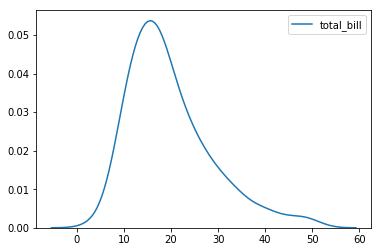

In [43]:
sns.kdeplot(tips['total_bill'],)

## Bivariate Distribution

 - jointplot
 - scatterplot
 - relplot
 
### jointplot

In seaborn `jointplot()` function,creates a multi-panel figure that shows both the bivariate (or joint) relationship between two variables along with the univariate (or marginal) distribution of each on separate axes.


jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

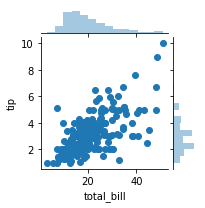

In [44]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter',height=3)
# Draw a scatter plot with marginal histogram

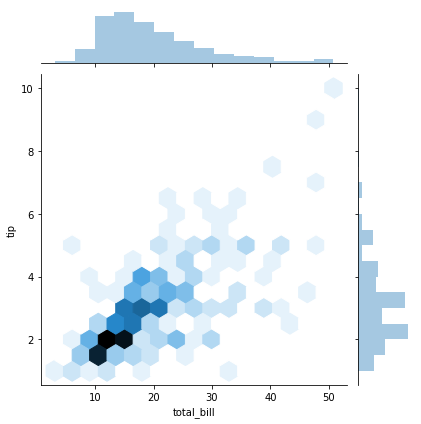

In [45]:
# The bivariate analogue of a histogram is known as a “hexbin” plot, because it shows the counts of observations that fall within hexagonal bins. 
# This plot works best with relatively large datasets. 
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

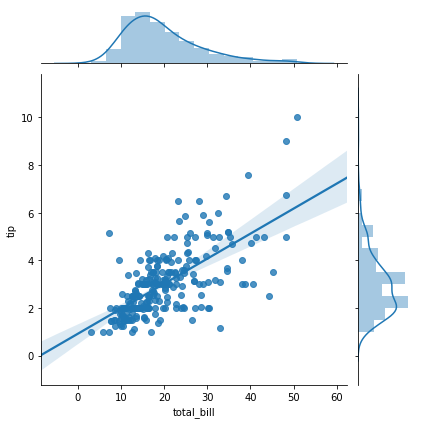

In [46]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

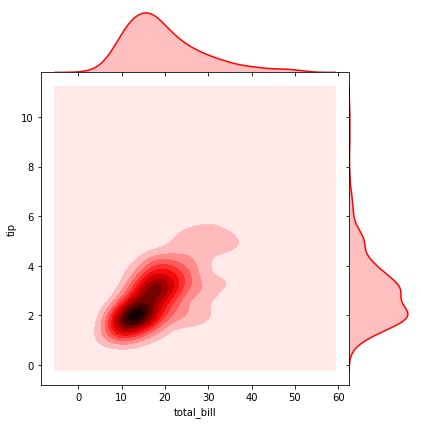

In [52]:
# Replace the scatterplots and histograms with density estimates and align the marginal Axes tightly with the joint Axes:
sns.jointplot(x=tips['total_bill'],y=tips['tip'],kind='kde',space=0,color='r')

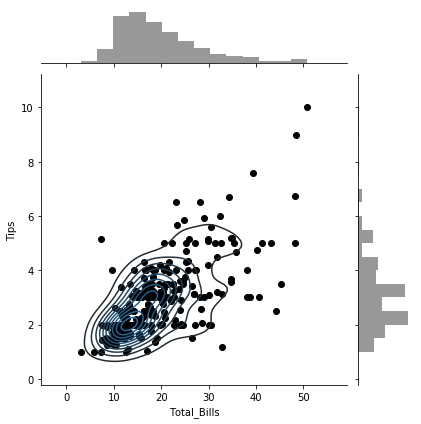

In [62]:
# Draw a scatterplot, then add a joint density estimate and set axis labels:
sns.jointplot(tips['total_bill'],tips['tip'],color='k').plot_joint(sns.kdeplot).set_axis_labels("Total_Bills","Tips")

### Scatterplot

The scatter plot is a mainstay of statistical visualization. It depicts the joint distribution of two variables using a cloud of points, where each point represents an observation in the dataset. This depiction allows the eye to infer a substantial amount of information about whether there is any meaningful relationship between them.

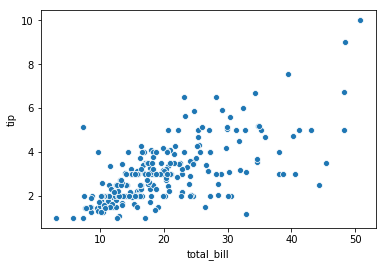

In [66]:
sns.scatterplot(x="total_bill", y="tip", data=tips)

The relationship between x and y can be shown for different subsets of the data using the hue, size, and style parameters. These parameters control what visual semantics are used to identify the different subsets. It is possible to show up to three dimensions independently by using all three semantic types, but this style of plot can be hard to interpret and is often ineffective. 

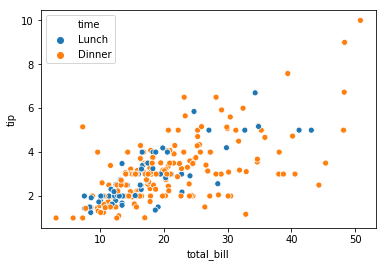

In [67]:
# Group by another variable and show the groups with different colors:
sns.scatterplot(x="total_bill", y="tip", hue="time",data=tips)

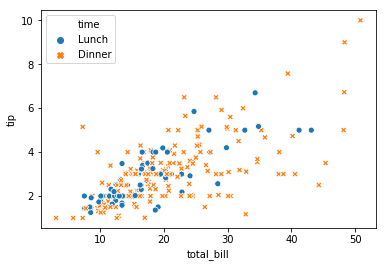

In [70]:
# Show the grouping variable by varying both color and marker:
sns.scatterplot(x="total_bill", y="tip", hue="time",data=tips,style='time')

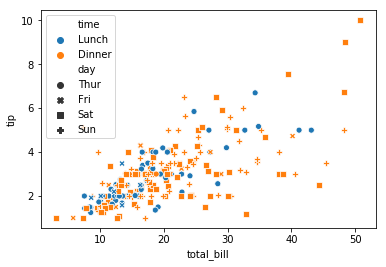

In [71]:
# Vary colors and markers to show two different grouping variables:
sns.scatterplot(x="total_bill", y="tip", hue="time",data=tips,style='day')

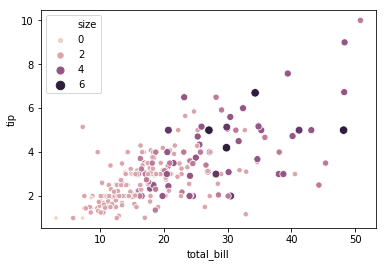

In [74]:
# Show a quantitative variable by varying the size of the points and also using continuous colors::
sns.scatterplot(x="total_bill", y="tip", hue='size',size='size',data=tips)

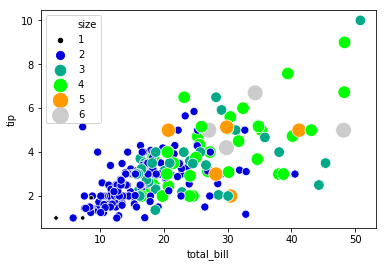

In [92]:
# Change the minimum and maximum point size and show all sizes in legend:
sns.scatterplot(x="total_bill", y="tip", hue='size',size='size',data=tips,sizes=(20,250),legend='full',
                palette='nipy_spectral')

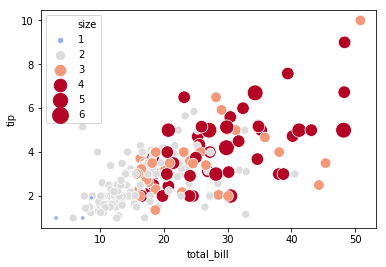

In [96]:
# Use a narrower range of color map intensities:
sns.scatterplot(x="total_bill", y="tip", hue='size',size='size',data=tips,sizes=(20,250),
                legend='full',
                palette='coolwarm',
                hue_norm=(0,4))

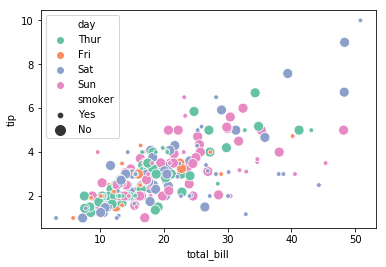

In [106]:
# Vary the size with a categorical variable, and use a different palette:
sns.scatterplot(x="total_bill", y="tip", hue='day',size='smoker',sizes=(100,22),data=tips,
                legend='full',
                palette='Set2',
                hue_norm=(0,4))

### relplot

Figure-level interface for drawing relational plots onto a FacetGrid.

This function provides access to several different axes-level functions that show the relationship between two variables with semantic mappings of subsets. The kind parameter selects the underlying axes-level function to use:

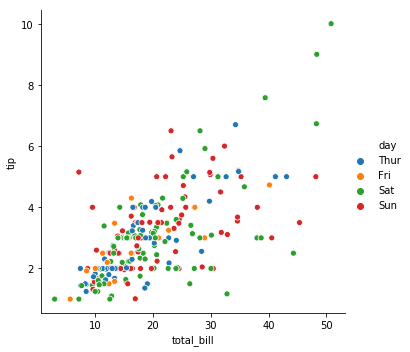

In [107]:
# Draw a single facet to use the FacetGrid legend placement:
sns.relplot(x="total_bill", y="tip", hue="day", data=tips)

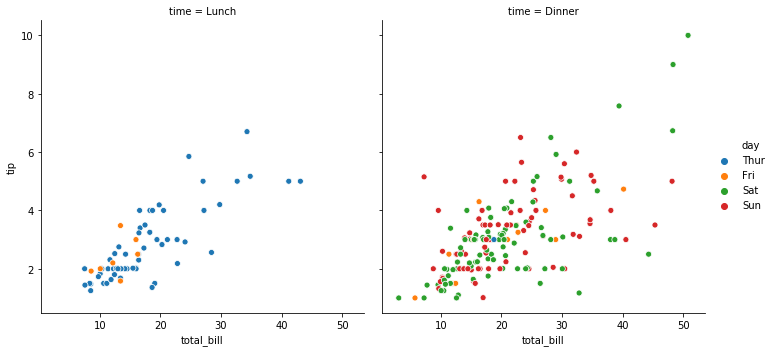

In [110]:
# Facet on the columns with another variable:
sns.relplot(x="total_bill", y="tip", col="time",hue='day',data=tips)

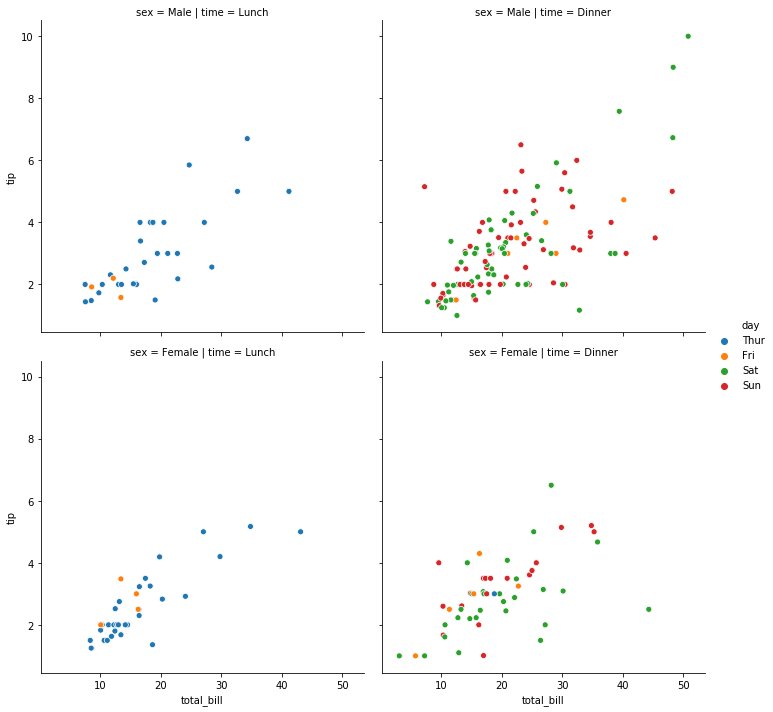

In [120]:
# Facet on the columns and rows:
sns.relplot(x="total_bill", y="tip", col="time",row='sex',hue='day',data=tips)

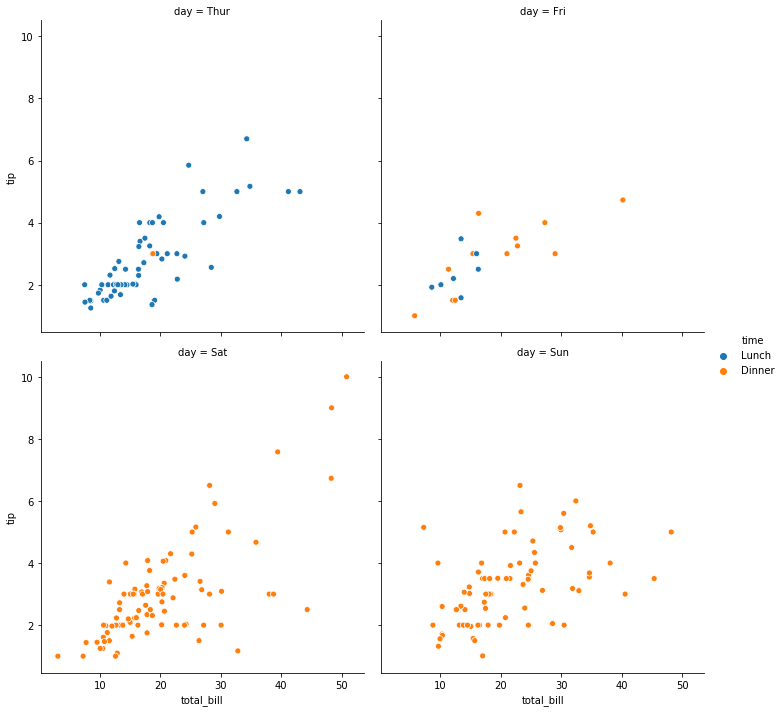

In [121]:
# “Wrap” many column facets into multiple rows:
sns.relplot(x="total_bill", y="tip", hue="time",col="day", col_wrap=2, data=tips)

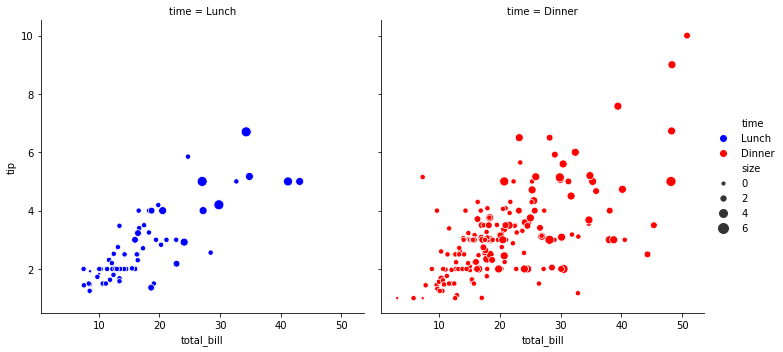

In [122]:
# Use multiple semantic variables on each facet with specified attributes:
sns.relplot(x="total_bill", y="tip", hue="time", size="size",
            palette=["b", "r"], sizes=(10, 100),
            col="time", data=tips)

## Visualizing pairwise relationships in a dataset

To plot multiple pairwise bivariate distributions in a dataset, you can use the `pairplot()` function. This creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame. by default, it also draws the univariate distribution of each variable on the diagonal Axes:

### pairplot

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

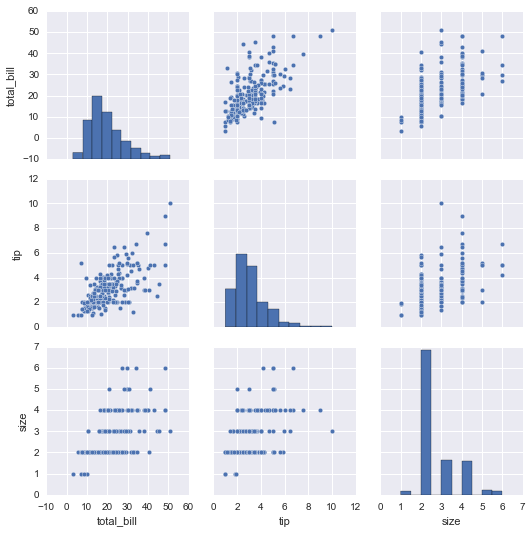

In [18]:
sns.pairplot(tips)

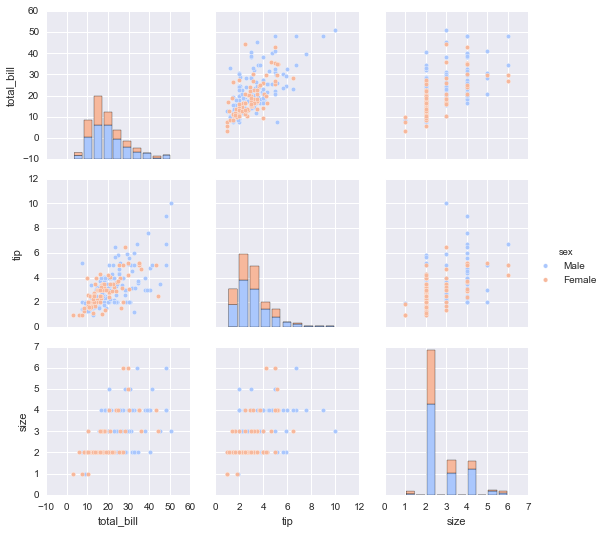

In [21]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

## rugplot

rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:

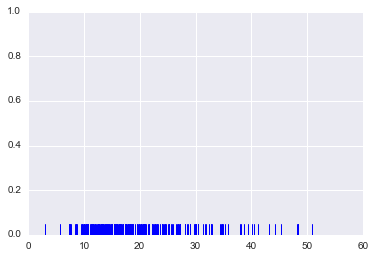

In [22]:
sns.rugplot(tips['total_bill'])

## kdeplot

kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example:

(0, 1)

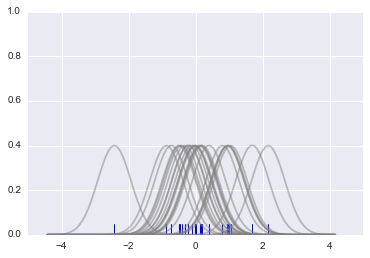

In [35]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

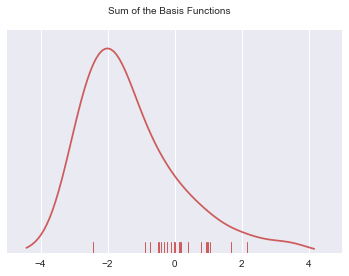

In [37]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

So with our tips dataset:

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


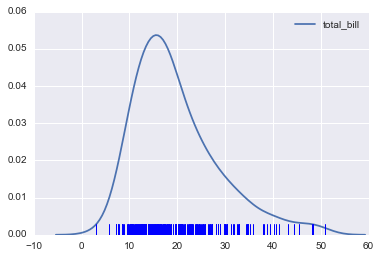

In [41]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


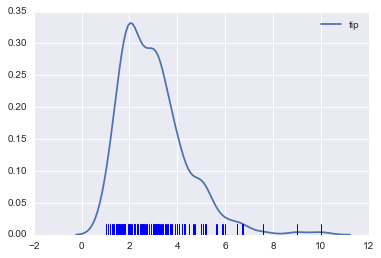

In [42]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])